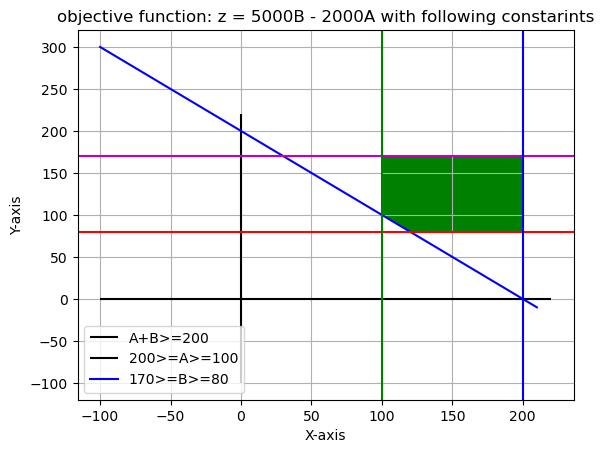


 calculating for point: A = 200.000000 and B = 170.000000
solution for z =  450000.0

 calculating for point: A = 100.000000 and B = 170.000000
solution for z =  650000.0

 calculating for point: A = 100.000000 and B = 100.000000
solution for z =  300000.0

 calculating for point: A = 120.000000 and B = 80.000000
solution for z =  160000.0

 calculating for point: A = 200.000000 and B = 80.000000
solution for z =  0.0

 the maximum profit z = $650000.000000 @ A = 100.000000 and B = 170.000000


In [1]:
import matplotlib.pyplot 
from matplotlib.pyplot import *
import numpy
from numpy import arange

figure()
A = arange(-100, 220, 10)
B = arange(-100, 220, 10)

B1 = 200.0 - A



xlim = (-100, 220)
ylim= (-100, 220)
hlines(0, -100, 220, color = 'k')
vlines(0, -100, 220, color = 'k')
grid(True)

xlabel('X-axis')
ylabel('Y-axis')

#Plotting graph

plot(A, B1, color = 'b')
axhline(y = 80, color = 'r')
axhline(y = 170, color = 'm')
axvline(x = 200, color = 'b')
axvline(x = 100, color = 'g')

title('objective function: z = 5000B - 2000A with following constarints')
legend(['A+B>=200','200>=A>=100','170>=B>=80'])

# get the co-ordinates of intersection points by mere visualisation
A = [200.0,100.0, 100.0, 120.0,200.0]
B = [170.0, 170.0, 100.0, 80.0, 80.0]
fill(A,B,'g+')


show()

#Getting Solution
checker = 0
for i,j in zip(A,B):
    print('\n calculating for point: A = {0:f} and B = {1:f}' .format(i,j))
    print('solution for z = ', 5000*j-2000*i)
    if(checker <= (5000*j-2000*i)):
       checker = (5000*j-2000*i)
       X,Y = i,j
       
print('\n the maximum profit z = ${0:f} @ A = {1:f} and B = {2:f}' .format(checker,X,Y))

In [3]:
!pip install pulp

In [7]:
from pulp import *
# declare your variables
A = LpVariable("A", 100, 200)   # 100 <= A <= 200
B = LpVariable("B", 80, 170) # 80 <= B <= 170
 
# defines the problem: optimization - Maximization
prob = LpProblem("problem", LpMaximize)
 
# defines the constraints
prob += A + B >=200 
prob += A<=200
prob += A>=100
prob += B>=80
prob += B<=170
 
# defines the objective function to maximize
prob += 5000*B-2000*A
 
# solve the problem
status = prob.solve()
print('printing status of the LP problem: ', LpStatus[status])
 
# print the results A = 100, B = 170
print('Value of model A car: ', value(A))
print('Value of model B car: ', value(B))
print('the optimal solution or say maximum profit: $', value(prob.objective))

printing status of the LP problem:  Optimal
Value of model A car:  100.0
Value of model B car:  170.0
the optimal solution or say maximum profit: $ 650000.0


In [9]:
import numpy as np
from scipy.optimize import minimize

#defining our Objective function
def objective(x):
    A = x[0]
    B = x[1]
    #since we are finding Max result using Minimizer. So returned the negative value.
    return -(5000*B-2000*A)

def constraint(x):
    return x[0]+x[1]-200

#boundations

b1 = [100, 200]     #bounds on A: 200 >= A >= 100
b2 = [80, 170]      #bounds on B: 170 >= B >= 80

bnds = (b1,b2)

#defining Inequality type of constraint.
con = {'type': 'ineq', 'fun': constraint}

# passing any guess value for A and B into minimize fuinction.
Xguess = [100,100]

#Predicting Maximization values for the objective function by seeding guess value Xguess; boundations included..
sol = minimize(objective, Xguess, method = 'SLSQP', options={'disp':True}, bounds = bnds, constraints = con)

print('About solution from Optimize.minnimize: \n' ,sol)


#assigning values to desired results.
profit = -sol.fun   #converting back to positive answer
CarA = sol.x[0]     # number of car A models
CarB = sol.x[1]     # number of car B models

print ('\n\n\nPrinting the Results: \n\n\n')
print('maximum Profit Gained: $', profit)
print('\n Number of Model A Cars: ',CarA)
print('\n Number of Model B Cars: ',CarB)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -650000.0
            Iterations: 7
            Function evaluations: 9
            Gradient evaluations: 3
About solution from Optimize.minnimize: 
  message: Optimization terminated successfully
 success: True
  status: 0
     fun: -650000.0
       x: [ 1.000e+02  1.700e+02]
     nit: 7
     jac: [ 2.000e+03 -5.000e+03]
    nfev: 9
    njev: 3



Printing the Results: 



maximum Profit Gained: $ 650000.0

 Number of Model A Cars:  100.0

 Number of Model B Cars:  170.0
